In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def inicio(c, s=[5.0, 3.5]):
    import matplotlib
    from cycler import cycler

    #matplotlib.use("pgf")
    #matplotlib.rcParams.update({
    #    "pgf.texsystem": "pdflatex",
    #    'font.family': 'serif',
    #    'text.usetex': True,
    #    'pgf.rcfonts': False,
    #    'figure.figsize': s,
    #    'scatter.edgecolors': "black"
    #})

    ccycler = 0
    if c <= 2:
        ccycler = (cycler(color=["royalblue", "tomato"]))
    if c == 3:
        ccycler = (cycler(color=["royalblue", "mediumseagreen", "tomato"]))
    if c >= 4:
        ccycler = (cycler(color=["royalblue", "mediumseagreen", "sandybrown", "tomato", "orchid"]))
    matplotlib.rcParams['axes.prop_cycle'] = ccycler

def guardar(n, xl, yl, leg=True, lab=True):
    import matplotlib.pyplot as plt
    if lab:
        plt.xlabel(xl)
        plt.ylabel(yl, rotation=0, labelpad=20)
    if leg: plt.legend()
    plt.savefig(n + ".pgf", bbox_inches = "tight")

In [3]:
#Regresión lineal sin término independiente
def reg_lin_b(x, y):
    print("---\nRegresión lineal sin término independiente\n---")

    n = len(x)

    sxy = (x*y).sum()
    sx2 = (x**2).sum()

    b = sxy / sx2

    sybx = ((y - b*x)**2).sum()
    s = (sybx / (n-1))**0.5
    sb = s / (sx2)**0.5

    sy2 = (y**2).sum()
    r = sxy / (sx2 * sy2)**0.5

    print("b=", b)
    print("s=", s, "sb=", sb)
    print("r=", r, "\n---")

    return (b, s, sb, r)

#Regresión lineal con término independiente
def reg_lin(x, y):
    print("---\nRegresión lineal con término independiente\n---")

    n = len(x)

    sx = x.sum()
    sy = y.sum()
    sxy = (x*y).sum()
    sx2 = (x**2).sum()
    sy2 = (y**2).sum()

    a = (sy*sx2 - sx*sxy) / (n*sx2 - sx**2)
    b = (n*sxy - sx*sy) / (n*sx2 - sx**2)

    sdesv = ((y - a - b*x)**2).sum()
    s = (sdesv/float(n-2))*0.5
    sa = s*(sx2 / (n*sx2 - sx**2))**0.5
    sb = s*(n / (n*sx2 - sx**2))**0.5

    r = (n*sxy - sx*sy)/(((n*sx2 - sx**2)*(n*sy2 - sy**2))**0.5)

    print("a=", a, "b=", b)
    print("s=", s, "sa=", sa, "sb=", sb)
    print("r=", r, "\n---")

    return (a, b, s, sa, sb, r)

#Regresión lineal ponderada con término independiente
def reg_lin_w(x, y, sy):
    print("---\nRegresión lineal ponderada con término independiente\n---")

    n = len(x)
    w = sy**(-2)

    sw = w.sum()
    swx = (w*x).sum()
    swy = (w*y).sum()
    swxy = (w*x*y).sum()
    swx2 = (w*x**2).sum()
    swy2 = (w*y**2).sum()
    det = sw * swx2 - swx**2

    a = (swy*swx2 - swx*swxy) / det
    b = (sw*swxy - swx*swy) / det

    sa = (swx2 / det)**0.5
    sb = (sw / det)**0.5

    swab = (w*(y - a - b*x)**2).sum()
    s = ((n / ((n-2) * sw)) * swab)**0.5

    r = (sw*swxy - swx*swy) / ((sw*swx2 - swx**2) * (sw*swy2 - swy**2))**0.5

    print("a=", a, "b=", b)
    print("s=", s, "sa=", sa, "sb=", sb)
    print("r=", r, "\n---")

    return (a, b, s, sa, sb, r)

#Regresión lineal ponderada sin término independiente
def reg_lin_wb(x, y, sy):
    print("---\nRegresión lineal ponderada sin término independiente\n---")

    n = len(x)
    w = sy**(-2)

    sw = w.sum()
    swx = (w*x).sum()
    swxy = (w*x*y).sum()
    swx2 = (w*x**2).sum()
    swy2 = (w*y**2).sum()

    b = swxy / swx2
    sb = 1 / (swx2)**0.5

    swb = (w*(y - b*x)**2).sum()
    s = ((n / ((n-1) * sw)) * swb)**0.5

    r = swxy / (swx2 * swy2)**0.5

    print("b=", b)
    print("s=", s, "sb=", sb)
    print("r=", r, "\n---")

    return (b, s, sb, r)

In [4]:
def tratamiento_datos(x, sb=0):
    import numpy as np
    #Media
    fmed = lambda x: x.sum() / len(x)
    med = fmed(x)

    #Desviación típica muestra
    fsa = lambda x, m: (((x - m)**2).sum() / (len(x) - 1))**0.5
    sa = fsa(x, med)

    #Valores discordantes
    k = 2
    lb = med - k*sa
    ub = med + k*sa
    e = np.array(np.where(np.logical_or(x <= lb, x >= ub))).flatten().astype(np.int32).tolist()

    #Eliminar valores y calcular de nuevo
    nx = np.delete(x, e)
    med = fmed(nx)
    sa = fsa(nx, med)

    #Desviación típica media
    sm = sa / len(nx)**0.5

    #Incertidumbre combinada
    sc = (sm**2 + sb**2)**0.5

    print("---\nTratamiento de datos\n---")
    print("Media: {}, sa: {}, sb: {}, sc: {}".format(med, sa, sb, sc))
    if len(e) > 0:
        print("Eliminados: {}".format(x[e]))
        print("Indices: {}\n---".format(e))

    return med, sc

In [5]:
inicio(1)

c = ["royalblue", "mediumseagreen", "sandybrown", "tomato"]

d = pd.read_csv("vir.csv", sep=';', decimal=',')
v = d["v"].to_numpy()
i = d["i"].to_numpy() * 0.001

b, s, sb, r = reg_lin_b(i, v)

---
Regresión lineal sin término independiente
---
b= 818.4611096015351
s= 0.40273570649445656 sb= 1.0004826028206175
r= 0.9999932759471292 
---


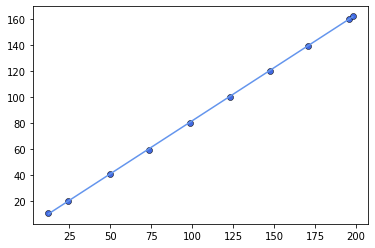

In [6]:
plt.clf()
plt.scatter(i*1000, v, edgecolors="black", linewidth=0.5)
xr = np.linspace(min(i*1000), max(i*1000), 20)
yr = b*xr*0.001
plt.plot(xr, yr, color="cornflowerblue")
#guardar("vir", "$I(mA)$", "$V(V)$", leg=False)

In [7]:
inicio(2)
d = pd.read_csv("v125a.csv", sep=';', decimal=',')
t = d["t"].to_numpy()
T1 = d["T1"].to_numpy() +273
T2 = d["T2"].to_numpy() +273

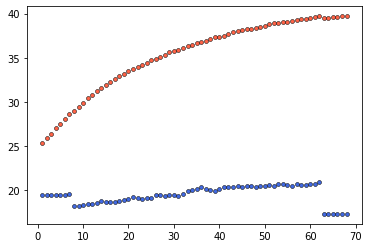

In [8]:
plt.clf()
plt.scatter(t, T1 -273, edgecolors="black", linewidth=0.5, label="$T_1$", s=16)
plt.scatter(t, T2 -273, edgecolors="black", linewidth=0.5, label="$T_2$", s=16)
#guardar("v125a", "$t(min)$", "$T(^{\circ} C)$", leg=True)

In [27]:
inicio(2)
d = pd.read_csv("v125a.csv", sep=';', decimal=',')
t = d["t"].to_numpy() *60
T1 = d["T1"].to_numpy() + 273
T2 = d["T2"].to_numpy() + 273

In [28]:
from scipy.optimize import curve_fit

p0 = (305, -16, -0.001)
def curva(x,a,b,c):
    return a + b * np.exp(c * x)
popt, pcov = curve_fit(curva, t, T2, p0)
print(popt)
print(np.sqrt(np.diag(pcov)))

xs = np.linspace(min(t), max(t), 100)
ys = (curva(xs, *popt)) #TODO: DO FOR THE OTHER ONE

[ 3.14094226e+02 -1.63297666e+01 -6.27121400e-04]
[5.12570266e-02 4.53888888e-02 5.70843615e-06]


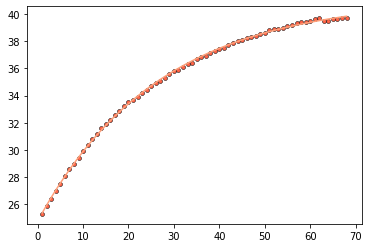

In [14]:
plt.clf()
#plt.scatter(t, T1, edgecolors="black", linewidth=0.5, label="$T_1$", s=16)
plt.scatter(t, T2 - 273, edgecolors="black", linewidth=0.5, label="$T_2$", s=16, c="tomato")
plt.plot(xs, ys - 273, color="lightsalmon")
#guardar("v125ar", "$t(min)$", "$T(^{\circ} C)$", leg=False)

In [17]:
d = pd.read_csv("v125a.csv", sep=';', decimal=',')
T1 = d["T1"].to_numpy() + 273
t, ut = tratamiento_datos(T1, 2.0)

---
Tratamiento de datos
---
Media: 292.7064516129032, sa: 0.7859151432402903, sb: 2.0, sc: 2.0024890262369945
Eliminados: [290.3 290.3 290.3 290.3 290.3 290.3]
Indices: [62, 63, 64, 65, 66, 67]
---


In [19]:
d = pd.read_csv("v150a.csv", sep=';', decimal=',')
T1 = d["T1"].to_numpy() + 273
t, ut = tratamiento_datos(T1, 0.1)

---
Tratamiento de datos
---
Media: 290.87272727272733, sa: 0.14201807347091436, sb: 0.1, sc: 0.1022662671203762


In [29]:
import uncertainties as u
T1u = u.ufloat(19.7 + 273, 2.0)
T2infu = u.ufloat(41.094 + 273, 0.051) #TODO: CHECK
RCu = u.ufloat(818.5, 1.0)
Vu = u.ufloat(125.2, 0.1)
c = u.ufloat(-6.271e-4, 0.0570e-4)

l = (Vu**2) / (RCu * (T2infu - T1u))
C = -l / c
print("{:.2u}".format(l))
print("{:.2u}".format(C))

T1u = u.ufloat(17.87 + 273, 0.10)
T2infu = u.ufloat(50.847 + 273, 0.054)
RCu = u.ufloat(818.5, 1.0)
Vu = u.ufloat(150.5, 0.1)
c = u.ufloat(-6.954e-4, 0.093e-4)

l = (Vu**2) / (RCu * (T2infu - T1u))
C = -l / c
print("{:.2u}".format(l))
print("{:.2u}".format(C))

0.895+/-0.084
(1.43+/-0.13)e+03
0.8392+/-0.0033
1207+/-17


In [94]:
d1 = pd.read_csv("v125b.csv", sep=';', decimal=',')
V1 = d1["V V"].to_numpy()
I1 = d1["I mA"].to_numpy() * 0.001
d2 = pd.read_csv("v150b.csv", sep=';', decimal=',')
V2 = d2["V V"].to_numpy()
I2 = d2["I mA"].to_numpy() * 0.001

a1, b1, s1, sa1, sb1, r1 = reg_lin(I1, V1)
a2, b2, s2, sa2, sb2, r2 = reg_lin(I2, V2)

---
Regresión lineal con término independiente
---
a= 1.130128189111537 b= -4.591161472219349
s= 1.0578800022342738e-05 sa= 1.578458131603031e-05 sb= 0.00010839725914014279
r= -0.9995787202922719 
---
---
Regresión lineal con término independiente
---
a= 1.632493584978249 b= -4.7090416384961395
s= 1.0966134387973477e-06 sa= 1.4612764129723757e-06 sb= 1.060222979232982e-05
r= -0.9999630221464199 
---


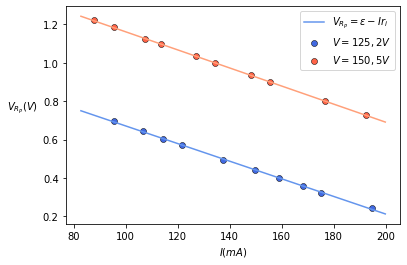

In [95]:
plt.clf()

I1 *= 1000
I2 *= 1000
b1 *= 0.001
b2 *= 0.001

plt.scatter(I1, V1, edgecolors="black", linewidth=0.5, label="$V = 125,2V$")
plt.scatter(I2, V2, edgecolors="black", linewidth=0.5, label="$V = 150,5V$")

xr1 = np.linspace(min(I2) - 5, max(I1) + 5, 20)
yr1 = a1 + b1*xr1
plt.plot(xr1, yr1, color="cornflowerblue", label="$V_{R_P} = \\varepsilon - Ir_i$")
xr2 = np.linspace(min(I2) - 5, max(I1) + 5, 20)
yr2 = a2 + b2*xr2
plt.plot(xr2, yr2, color="lightsalmon")

guardar("vb", "$I(mA)$", "$V_{R_P}(V)$", leg=True)

In [96]:
a1 = u.ufloat(1.172, 0.001)
b1 = u.ufloat(1.661, 0.001)
a2 = u.ufloat(1.130128, 1.6e-5)
b2 = u.ufloat(1.6324936, 1.5e-6)

a = (a1 + a2)/2 #TODO: CHECK
b = (b1 + b2)/2

print("{:.2u}".format(a))
print("{:.2u}".format(b))

1.15106+/-0.00050
1.64675+/-0.00050


In [97]:
T1u = u.ufloat(19.7 + 273, 2.0) #TODO: CHECK
T2infu = u.ufloat(41.094 +273, 0.051)

S = a / (T2infu - T1u)
print("{:.2u}".format(S))

T1u = u.ufloat(17.87, 0.10)
T2infu = u.ufloat(50.847, 0.054)

S = b / (T2infu - T1u)
print("{:.2u}".format(S))

0.0538+/-0.0050
0.04994+/-0.00017
